<img width="200" style="float:right" src="https://github.com/danielscarvalho/Insper-DS-Dicas/blob/master/Insper-Logo.png?raw=true">

# Computação para Ciências dos Dados

<sub><a href="https://www.insper.edu.br/pos-graduacao/programas-avancados/data-science-e-decisao/">PÓS-
GRADUAÇÃO EM DATA SCIENCE E DECISÃO</a></sub>

## Dica do Dia: 036


Análise visual dos dados de "Global Temperature | Vital Signs – Climate Change - NASA"

Análise preliminar dos dados em arquivo TXT... com os comandos do Linux (Funciona no Linux, Mac e Colab. Não funciona no Windows)...

Baixar o arquivo TXT de dados com o utilitário wget:

In [3]:
!wget https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt

--2025-08-31 15:10:17--  https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt
Resolving data.giss.nasa.gov (data.giss.nasa.gov)... 2001:4d0:2310:151::233, 129.164.141.233
Connecting to data.giss.nasa.gov (data.giss.nasa.gov)|2001:4d0:2310:151::233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3750 (3.7K) [text/plain]
Saving to: ‘graph.txt’

graph.txt           100%[===================>]   3.66K  --.-KB/s    in 0s      

2025-08-31 15:10:18 (269 MB/s) - ‘graph.txt’ saved [3750/3750]



Listar os arquivos:

In [4]:
!ls *.txt

core.txt  graph.txt  info.txt


Espiar o topo do arquivo, há 5 linhas de cabeçalho:

In [5]:
!head graph.txt

Land-Ocean Temperature Index (C)
--------------------------------

Year No_Smoothing  Lowess(5)
----------------------------
1880     -0.17     -0.10
1881     -0.09     -0.13
1882     -0.11     -0.17
1883     -0.17     -0.20
1884     -0.28     -0.24


Espiar o conteúdo no fim do arquivo:

In [6]:
!tail graph.txt

2015      0.90      0.83
2016      1.01      0.87
2017      0.92      0.91
2018      0.85      0.93
2019      0.98      0.94
2020      1.01      0.97
2021      0.85      1.02
2022      0.89      1.08
2023      1.17      1.13
2024      1.28      1.19


Com o wc podemos ver o número de linhas, palavras e bytes do arquivo TXT: 

In [18]:
!wc graph.txt

 150  444 3750 graph.txt


Com o Pandas podemos também importar o arquivo TXT a partir da URL, o arquivo texto é colunado, isso era comum antigamente (legado) com MAINFRAME e COBOL.

In [1]:
URL="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"

In [2]:
import pandas as pd

In [16]:
# ocean_temperature_df = pd.read_csv(URL, sep="\t", skiprows=5, names=["year","temperature","smoth_temperature"]) 

Importando o arquivo TXT informado quantas colunas (caracteres) os 3 campos ocupam no arquivo colunado:

In [106]:
ocean_temperature_df = pd.read_fwf(URL, widths=[4, 10, 10], skiprows=5, names=["year","temperature","smoth_temperature"]) 

In [89]:
ocean_temperature_df

,year,temperature,smoth_temperature
0,1880,-0.17,-0.10
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.17,-0.20
4,1884,-0.28,-0.24
...,...,...,...
140,2020,1.01,0.97
141,2021,0.85,1.02
142,2022,0.89,1.08
143,2023,1.17,1.13


Usando sample para obter uma amostra dos dados e visualizando com a trasnposta:

In [34]:
ocean_temperature_df.sample(3).T

,54,23,17
year,1934.00,1903.00,1897.00
temperature,-0.13,-0.38,-0.11
smoth_temperature,-0.16,-0.29,-0.19


Note que o data frame Pandas importou os tipos de dados corretamente int e float:

In [35]:
ocean_temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               145 non-null    int64  
 1   temperature        145 non-null    float64
 2   smoth_temperature  145 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.5 KB


Verificando os dados com estatística descritiva:

In [36]:
ocean_temperature_df.describe()

,year,temperature,smoth_temperature
count,145.000000,145.000000,145.000000
mean,1952.000000,0.074207,0.075310
std,42.001984,0.392447,0.384408
min,1880.000000,-0.490000,-0.420000
25%,1916.000000,-0.200000,-0.220000
50%,1952.000000,-0.030000,-0.040000
75%,1988.000000,0.310000,0.310000
max,2024.000000,1.280000,1.190000


Visualizando os dados da coluna smoth_temperature:

<Axes: >

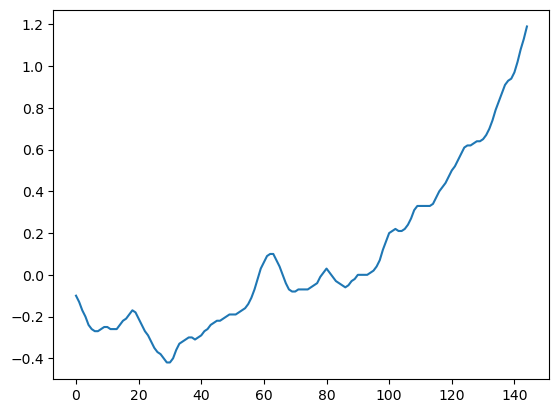

In [37]:
ocean_temperature_df.smoth_temperature.plot.line()

Visualizando os dados da coluna temperature:

<Axes: >

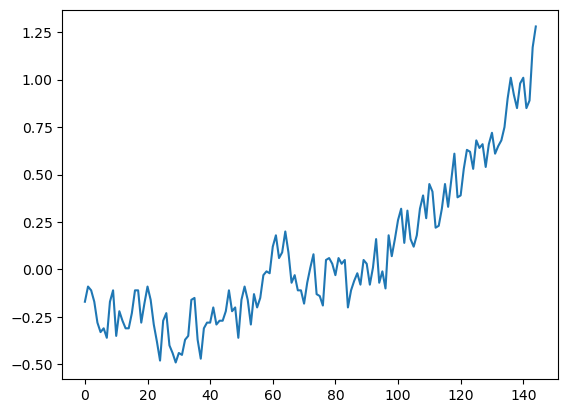

In [38]:
ocean_temperature_df.temperature.plot.line()

Importando mais ferramentas de ciências dos dados:

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Histograma da temperatura global:

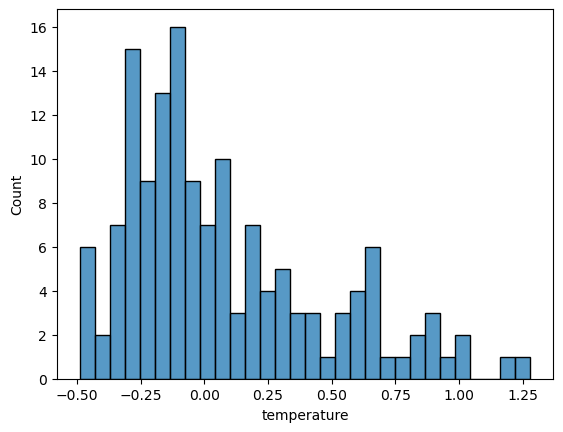

In [64]:
   sns.histplot(data=ocean_temperature_df, x="temperature", bins=30)
   plt.show()

Scatter plot com 3 dimensões de dados:

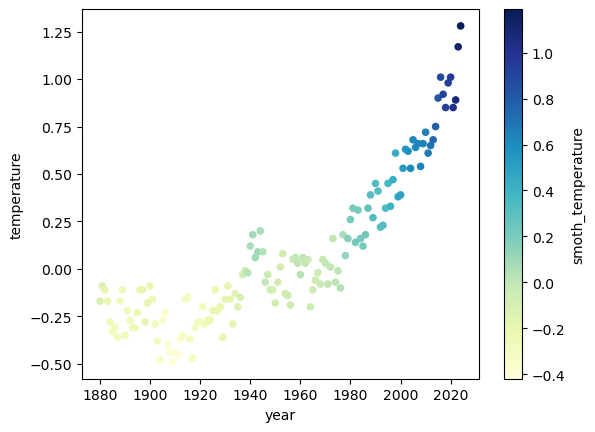

In [113]:
ocean_temperature_df.plot.scatter(x='year',
                                  y='temperature',
                                  c='smoth_temperature',
                                  cmap="YlGnBu")
plt.show()

Regressão linear da temperatura global, note a tendência:

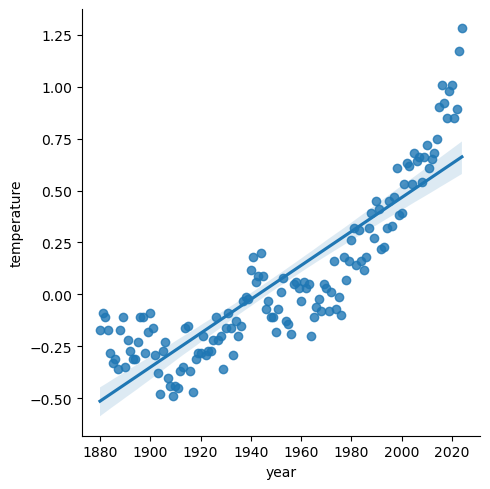

In [111]:
sns.lmplot(x="year", y="temperature", data=ocean_temperature_df)
plt.show()

Regressão linear (AI ML) da coluna smoth_temperature:

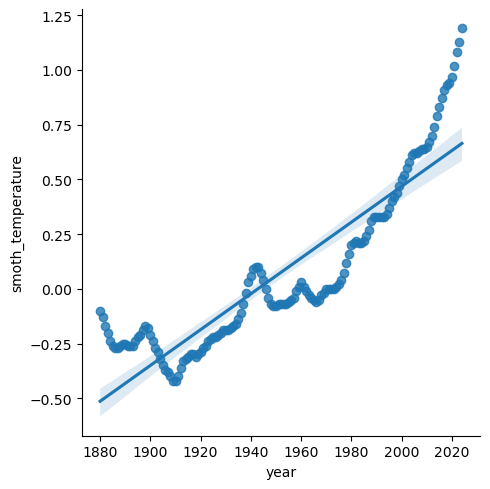

In [112]:
sns.lmplot(x="year", y="smoth_temperature", data=ocean_temperature_df)
plt.show()

Criando uma visualização heat map (mapa de calor) entre as duas colunas de temperatura:

In [116]:
heatmap_data_df = pd.crosstab(ocean_temperature_df['temperature'], 
                              ocean_temperature_df['year'])

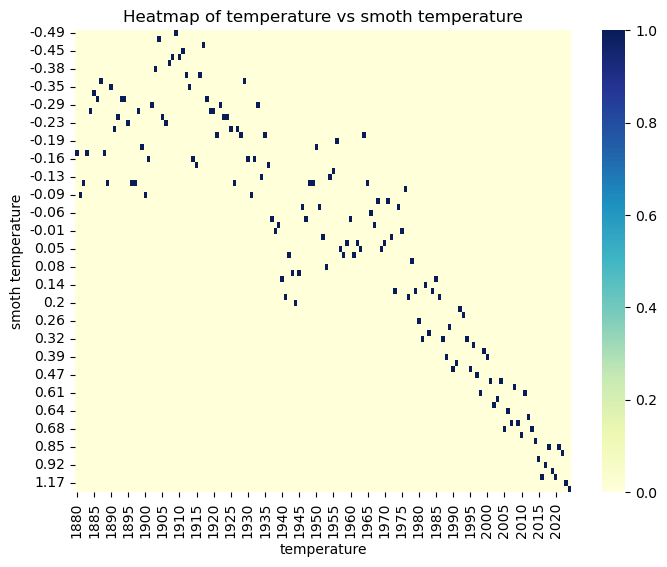

In [117]:
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_df,  cmap="YlGnBu")
plt.title('Heatmap of temperature vs smoth temperature')

plt.xlabel('temperature')
plt.ylabel('smoth temperature')

plt.show()

Espiando os dados da coluna temperatura:

In [68]:
ocean_temperature_df['temperature']

0     -0.17
1     -0.09
2     -0.11
3     -0.17
4     -0.28
       ... 
140    1.01
141    0.85
142    0.89
143    1.17
144    1.28
Name: temperature, Length: 145, dtype: float64

Vamos criar uma matrix para visualização mais interessante da temperatura ao longo do tempo como uma imagem:

In [118]:
temperature_serie = ocean_temperature_df['temperature']

matrix = np.repeat(temperature_serie.values[:, np.newaxis], 100, axis=0)

Esta matriz tem em cada coluna a temperatura anual, e as linhas são apenas uma repetição do valor, 100 linhas.

In [92]:
matrix

array([[-0.17],
       [-0.17],
       [-0.17],
       ...,
       [ 1.28],
       [ 1.28],
       [ 1.28]])

In [93]:
matrix.shape

(14500, 1)

Agora visualizamos a temperatura global ao ano em uma visualização em cores (mapa de temperatura), cada linha vertical é a temperatura global de um ano, conforme dados da NASA:

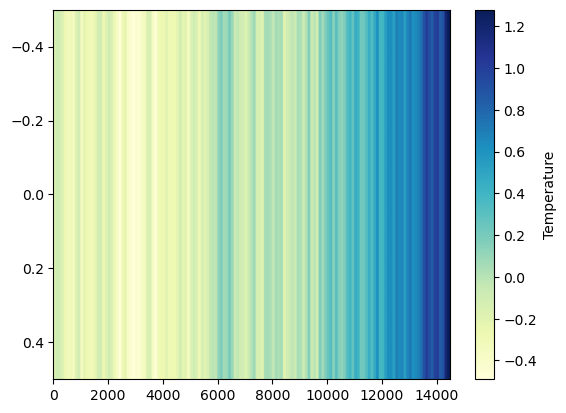

In [100]:
plt.imshow(matrix.T, cmap="YlGnBu", aspect='auto')
plt.colorbar(label='Temperature')

plt.show()

Inspiração:

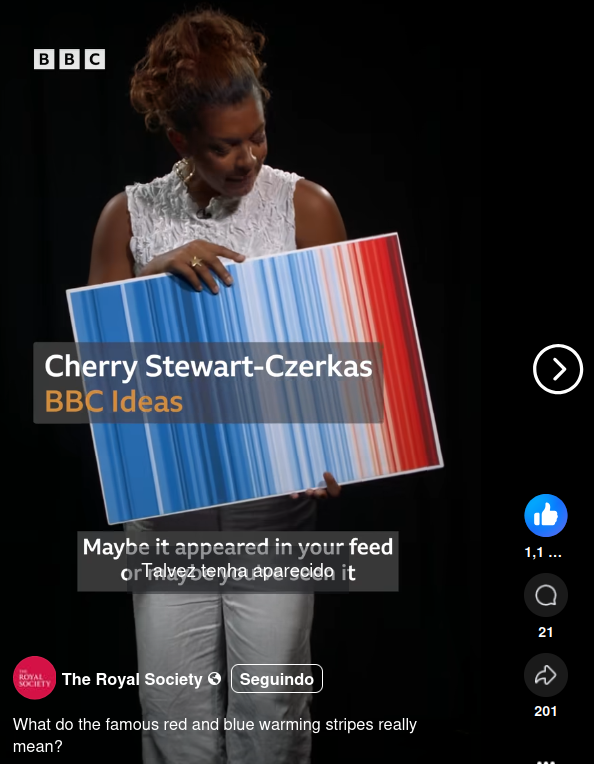<br>
https://www.facebook.com/share/r/1767cH7e6A/

Referências:

- https://www.facebook.com/share/r/1767cH7e6A/
- https://climate.nasa.gov/vital-signs/global-temperature/?intent=121
- https://seaborn.pydata.org/generated/seaborn.regplot.html